In [1]:
import os 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import h5py
import numpy as np 


from scipy.integrate import simps
from scipy.optimize import curve_fit
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
from scipy.interpolate import CubicSpline

sns.set_context("talk")

%matplotlib inline

In [4]:
def read_timeseries(filename):
    print("oppening %s"%filename)
    h5file=h5py.File(filename)
    data_dict=dict()
    for k in h5file.keys():
        units=h5file[k].attrs['units']
        data_dict["%s (%s)"%(k.replace("_"," "),units)]=h5file[k][:]
    df_tmp=pd.DataFrame(data_dict)
    df_tmp=df_tmp.drop(columns=[x for x in df_tmp.columns if "group" in x])
    df_tmp['time (ns)']=df_tmp['time (ps)']*0.001
    return df_tmp


results_directory={"../results/gromacs/nanoparticle/1nm/results/md_prod_200/":"1"
                   ,"../results/gromacs/nanoparticle/2nm/results/md_prod_200/":"2"
                   ,"../results/gromacs/nanoparticle/4nm/results/md_prod_200/":"4"
                   ,"../results/gromacs/nanoparticle/8nm/results/md_prod_200/":"8"
                   ,"../results/gromacs/bulk/results/md_prod_200/":"bulk"
                  }
df_list=list()
for data_directory,radius in results_directory.items():
    for filename in os.listdir(data_directory):
        if not "rmsd.h5" in filename:
            continue
        df_tmp=read_timeseries(os.path.join(data_directory,filename))
        directory_split=data_directory.split("/")
        system=directory_split[3]
        df_tmp["Radius (nm)"]=radius
        
        df_list.append(df_tmp)
        
df_rmsd_gromacs=pd.concat(df_list,ignore_index=True)

df_list=list()
for data_directory,radius in results_directory.items():
    for filename in os.listdir(data_directory):
        if not "ecc.h5" in filename:
            continue
        df_tmp=read_timeseries(os.path.join(data_directory,filename))
        directory_split=data_directory.split("/")
        system=directory_split[3]
        df_tmp["Radius (nm)"]=radius
        
        df_list.append(df_tmp)
        
df_ecc_gromacs=pd.concat(df_list,ignore_index=True)



oppening ../results/gromacs/nanoparticle/1nm/results/md_prod_200/rmsd.h5
oppening ../results/gromacs/nanoparticle/2nm/results/md_prod_200/rmsd.h5
oppening ../results/gromacs/nanoparticle/4nm/results/md_prod_200/rmsd.h5
oppening ../results/gromacs/nanoparticle/8nm/results/md_prod_200/rmsd.h5
oppening ../results/gromacs/bulk/results/md_prod_200/rmsd.h5
oppening ../results/gromacs/nanoparticle/1nm/results/md_prod_200/ecc.h5
oppening ../results/gromacs/nanoparticle/2nm/results/md_prod_200/ecc.h5
oppening ../results/gromacs/nanoparticle/4nm/results/md_prod_200/ecc.h5
oppening ../results/gromacs/nanoparticle/8nm/results/md_prod_200/ecc.h5


In [10]:
input_dict={"../results/gromacs/nanoparticle/1nm/results/md_prod_200/rog/rog.csv":"1"
           ,"../results/gromacs/nanoparticle/2nm/results/md_prod_200/rog/rog.csv":"2"
           ,"../results/gromacs/nanoparticle/4nm/results/md_prod_200/rog/rog.csv":"4"
           ,"../results/gromacs/nanoparticle/8nm/results/md_prod_200/rog/rog.csv":"8"
                  }

df_list=list()
for input_file,radius in input_dict.items():
    df_tmp=pd.read_csv(input_file).rename(columns={"Radius (nm)":"Radius of Gyration ($nm$)"})
    df_tmp["Radius (nm)"]=radius
    df_tmp["Time (ns)"]=df_tmp["Time (ps)"]/1000
    df_list.append(df_tmp)
df_rog=pd.concat(df_list,ignore_index=True)

df_rog_summary=df_rog.groupby("Radius (nm)")["Radius of Gyration ($nm$)"].describe()[["mean","std"]]
print(df_rog_summary.to_latex(index=True,formatters={"name": str.upper},float_format="{:.4f}".format))
df_ecc_summary=df_ecc_gromacs.groupby("Radius (nm)")["eccentricity (unitless)"].describe()[["mean","std"]]
print(df_ecc_summary.to_latex(index=True,formatters={"name": str.upper},float_format="{:.4f}".format))


df_summary=df_rog_summary.rename(columns={"mean":"$\mu_{rog}(nm)$","std":"$\sigma_{rog}(nm)$"}).join(
df_ecc_summary.rename(columns={"mean":"$\mu_{ecc}(nm)$","std":"$\sigma_{ecc}(nm)$"}))
print(df_summary.to_latex(index=True,formatters={"name": str.upper},float_format="{:.4f}".format))


\begin{tabular}{lrr}
\toprule
{} &   mean &    std \\
Radius (nm) &        &        \\
\midrule
1           & 0.8062 & 0.0007 \\
2           & 1.5825 & 0.0005 \\
4           & 3.1487 & 0.0003 \\
8           & 6.2824 & 0.0006 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &   mean &    std \\
Radius (nm) &        &        \\
\midrule
1           & 0.0266 & 0.0010 \\
2           & 0.0011 & 0.0003 \\
4           & 0.0118 & 0.0001 \\
8           & 0.0012 & 0.0001 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &  \$\textbackslash mu\_\{rog\}(nm)\$ &  \$\textbackslash sigma\_\{rog\}(nm)\$ &  \$\textbackslash mu\_\{ecc\}(nm)\$ &  \$\textbackslash sigma\_\{ecc\}(nm)\$ \\
Radius (nm) &                  &                     &                  &                     \\
\midrule
1           &           0.8062 &              0.0007 &           0.0266 &              0.0010 \\
2           &           1.5825 &              0.0005 &           0.0011 &              0.00

/tmp/ipykernel_1534/1901026441.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_rog_summary.to_latex(index=True,formatters={"name": str.upper},float_format="{:.4f}".format))
/tmp/ipykernel_1534/1901026441.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_ecc_summary.to_latex(index=True,formatters={"name": str.upper},float_format="{:.4f}".format))
/tmp/ipykernel_1534/1901026441.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected

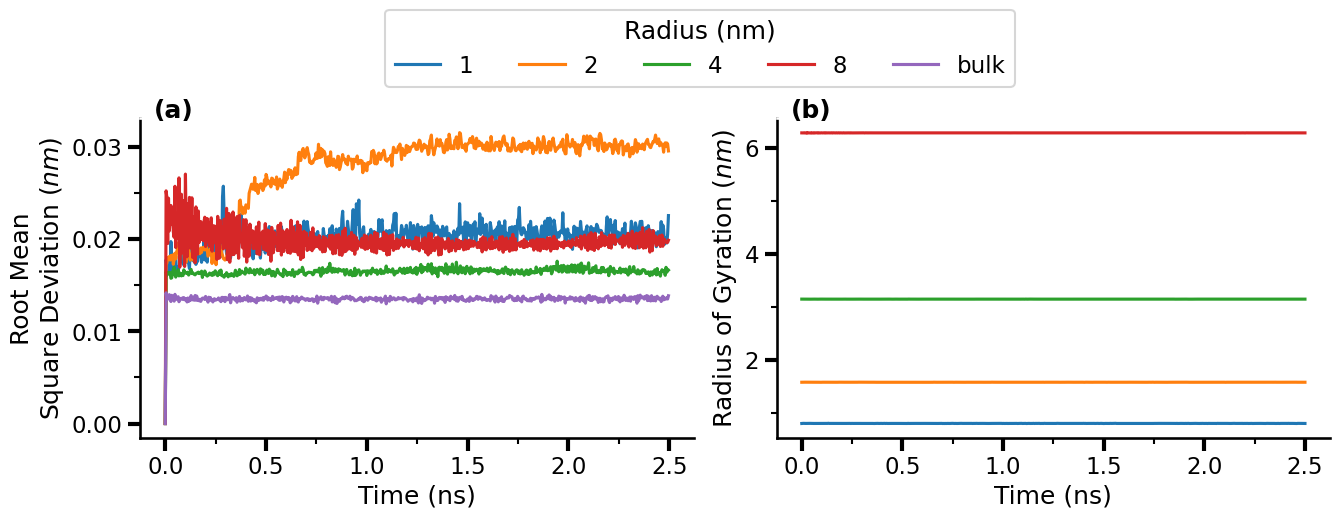

In [11]:

fig, axs = plt.subplots(ncols=2,figsize=(7*2,4))
sns.set_context("talk")



labx=0.025
laby=1

ax=axs[0]
ax.text(labx, laby, '(a)',weight='bold' ,transform=ax.transAxes)

sns.lineplot(data=df_rmsd_gromacs
                    ,y="rmsd total (nm)"
                    ,x='time (ns)'
                    ,hue="Radius (nm)"
                     ,ax=ax
#                     ,palette="Blues"
               )

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('1')
ax.spines['right'].set_color('1')
ax.spines['left'].set_color('0')
ax.tick_params(direction='out', width=3, bottom=True, left=True)
ax.grid(False)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Root Mean\nSquare Deviation ($nm$)")

sns.move_legend(ax,'lower center',bbox_to_anchor=(0.5,0.95), ncol=5
                ,bbox_transform=fig.transFigure
               )

ax.xaxis.set_minor_locator(MultipleLocator(0.5/2))
ax.yaxis.set_minor_locator(MultipleLocator(0.01/2))
ax.tick_params(which='minor', length=4)


ax=axs[1]
ax.text(labx, laby, '(b)',weight='bold' ,transform=ax.transAxes)

sns.lineplot(data=df_rog
                    ,y="Radius of Gyration ($nm$)"
                    ,x='Time (ns)'
                    ,hue="Radius (nm)"
                     ,ax=ax
                 ,legend=False
               )

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('1')
ax.spines['right'].set_color('1')
ax.spines['left'].set_color('0')
ax.tick_params(direction='out', width=3, bottom=True, left=True)
ax.grid(False)
ax.set_xlabel("Time (ns)")

ax.xaxis.set_minor_locator(MultipleLocator(0.5/2))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='minor', length=4)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.3
                   )

plt.savefig("../figures/fig6.pdf", pad_inches=0.2,bbox_inches="tight")